> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (noshowappointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset collected information from 100k medical appointments in Brazil and is concentrated  on the question of whether or not patients show up for their appointment.  


Data Dictionary:

01 - PatientId

Identification of a patient


02 - AppointmentID

Identification of each appointment


03 - Gender

Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.


04 - DataMarcacaoConsulta

The day of the actuall appointment, when they have to visit the doctor.


05 - DataAgendamento

The day someone called or registered the appointment, this is before appointment of course.


06 - Age

How old is the patient.


07 - Neighbourhood

Where the appointment takes place.


08 - Scholarship

True of False . 


09 - Hipertension

True or False





























### The questions are:
1) What factors are important for us to know in order to predict if a patient   will show up for their scheduled appointment?
 
2) did the kind of Gender affects the patient show  up the appointment?
    

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
df.shape 

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [9]:
#show corrolation 
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63331dbb38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f6332fce400>]], dtype=object)

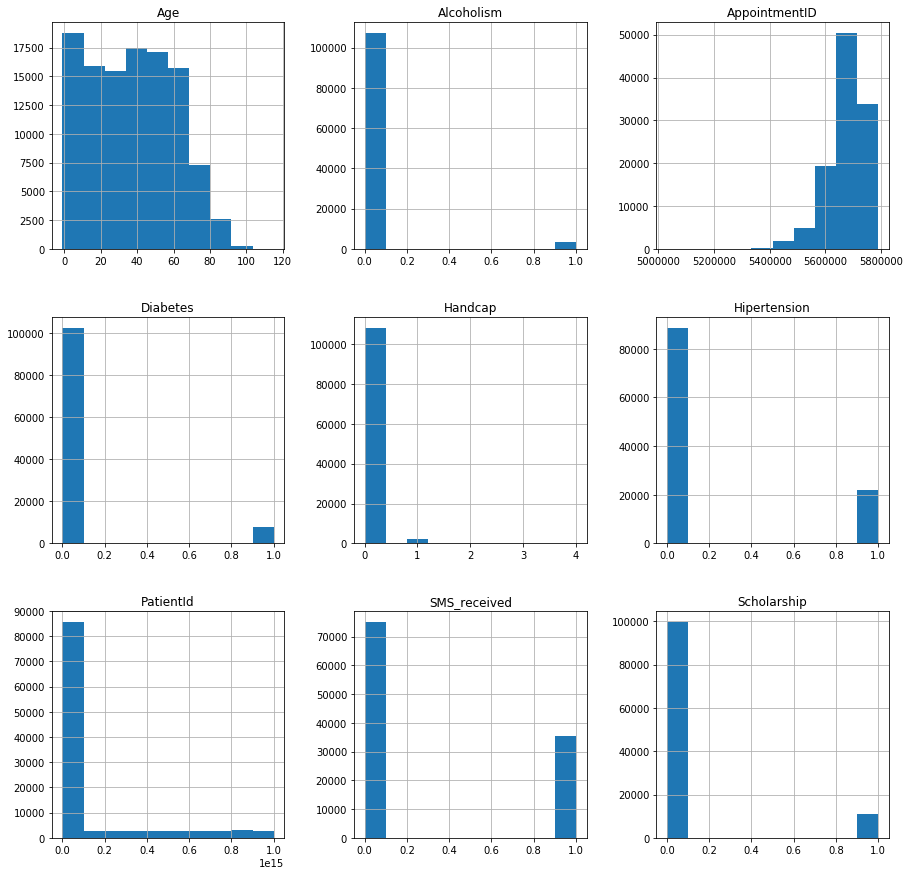

In [10]:
 ### histgram for all data
df.hist(figsize=(15,15))  

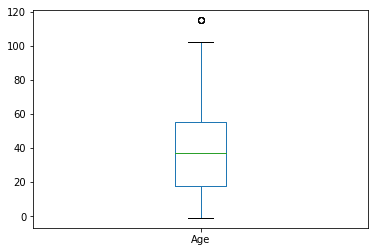

In [11]:
df['Age'].plot(kind='box');

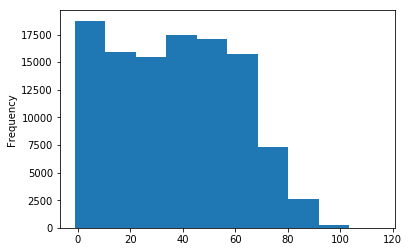

In [12]:
df['Age'].plot(kind='hist');

### most of patients didn't suffer from ('Diabetes', 'Alcoholism', 'Handcap')
### many  patient havn't received the sms 
### about 20000 patients suffer from 'Hipertension'

In [13]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning
(drop  not important columns ['AppointmentID','PatientId'])

  duplicate data rows need to be dropped
renaming  Hipertension to Hypertension
drop rows that involves age that less or equel to 0
  
  checking for missing values
 
 renaming 'No-show' to 'No_show'
 working on 'No_show' column to make it easy for understanding

In [14]:
 df.drop(['AppointmentID','PatientId'],axis=1,inplace=True)

    



In [15]:
#   number of duplicates in 2008 and 2018 datasets

sum(df.duplicated())

635

In [16]:
# age =<0
df.drop(df[df['Age']<=0].index,inplace=True)

In [17]:
# drop duplicates in   datasets

df.drop_duplicates(inplace=True)

In [18]:
#   number of duplicates again to confirm dedupe - should   be 0
print(df.duplicated().sum())

0


In [19]:
# view missing value count for each feature in dataset
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [20]:
# checks if any of columns in dataset have null values - 
df.isnull().sum().any()

False

In [21]:
# rename No-show column
df.rename(columns={"No-show":"No_show"}, inplace=True)

In [22]:
 df.No_show.value_counts()


No     84899
Yes    21462
Name: No_show, dtype: int64

In [23]:
# rename Hipertension column
df.rename(columns={"Hipertension":"Hypertension"}, inplace=True)

In [24]:
df.tail()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [25]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6332cd9b38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f632ffa27b8>]], dtype=object)

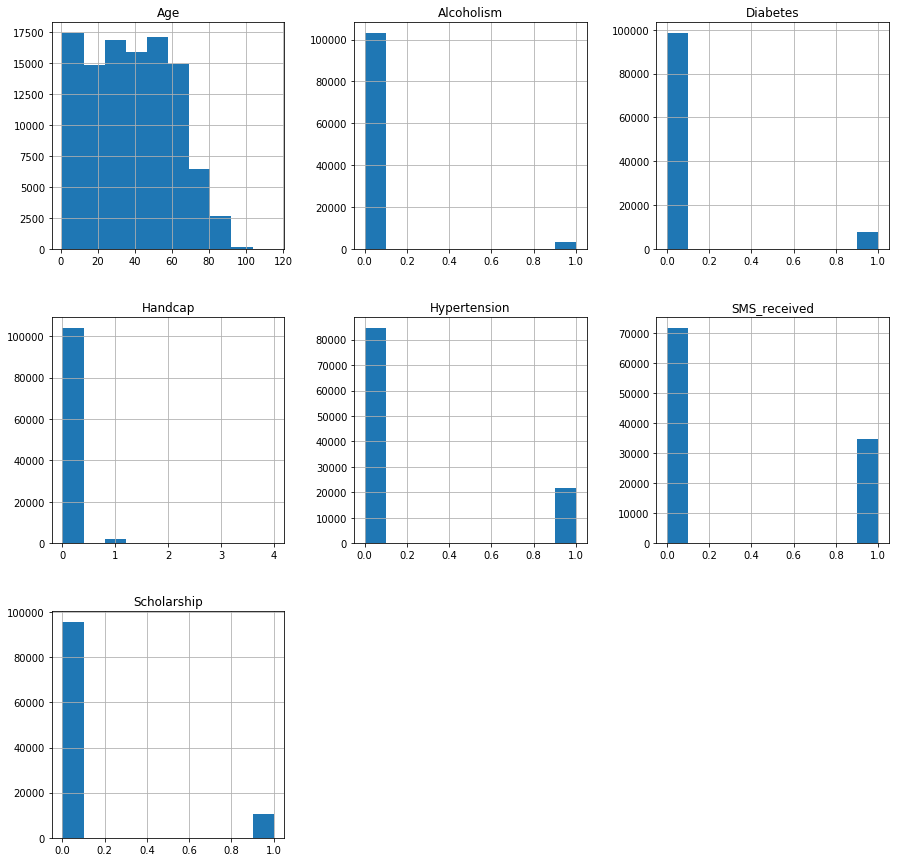

In [26]:
 ### histgram for all data
df.hist(figsize=(15,15)) 

In [27]:
df.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,1.000000,-0.112764,0.502037,0.290655,0.090248,0.073536,0.005125
Scholarship,-0.112764,1.000000,-0.024517,-0.027571,0.032900,-0.010245,-0.000081
Hypertension,0.502037,-0.024517,1.000000,0.430672,0.085268,0.078622,-0.008884
Diabetes,0.290655,-0.027571,0.430672,1.000000,0.017029,0.056971,-0.016122
Alcoholism,0.090248,0.032900,0.085268,0.017029,1.000000,0.002165,-0.027645
Handcap,0.073536,-0.010245,0.078622,0.056971,0.002165,1.000000,-0.024864
SMS_received,0.005125,-0.000081,-0.008884,-0.016122,-0.027645,-0.024864,1.000000


### Research Question 1  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [28]:
#working on 'No_show' column to make it easy for understanding
SH_UP=df["No_show"]=='No'
no_SH_UP=df["No_show"]=='Yes'

In [29]:
print(SH_UP.value_counts())
print(no_SH_UP.value_counts())


True     84899
False    21462
Name: No_show, dtype: int64
False    84899
True     21462
Name: No_show, dtype: int64


In [30]:
df[no_SH_UP].count()

Gender            21462
ScheduledDay      21462
AppointmentDay    21462
Age               21462
Neighbourhood     21462
Scholarship       21462
Hypertension      21462
Diabetes          21462
Alcoholism        21462
Handcap           21462
SMS_received      21462
No_show           21462
dtype: int64

In [31]:
df[SH_UP].count()

Gender            84899
ScheduledDay      84899
AppointmentDay    84899
Age               84899
Neighbourhood     84899
Scholarship       84899
Hypertension      84899
Diabetes          84899
Alcoholism        84899
Handcap           84899
SMS_received      84899
No_show           84899
dtype: int64

 we use pairplot to show the releation between each feature

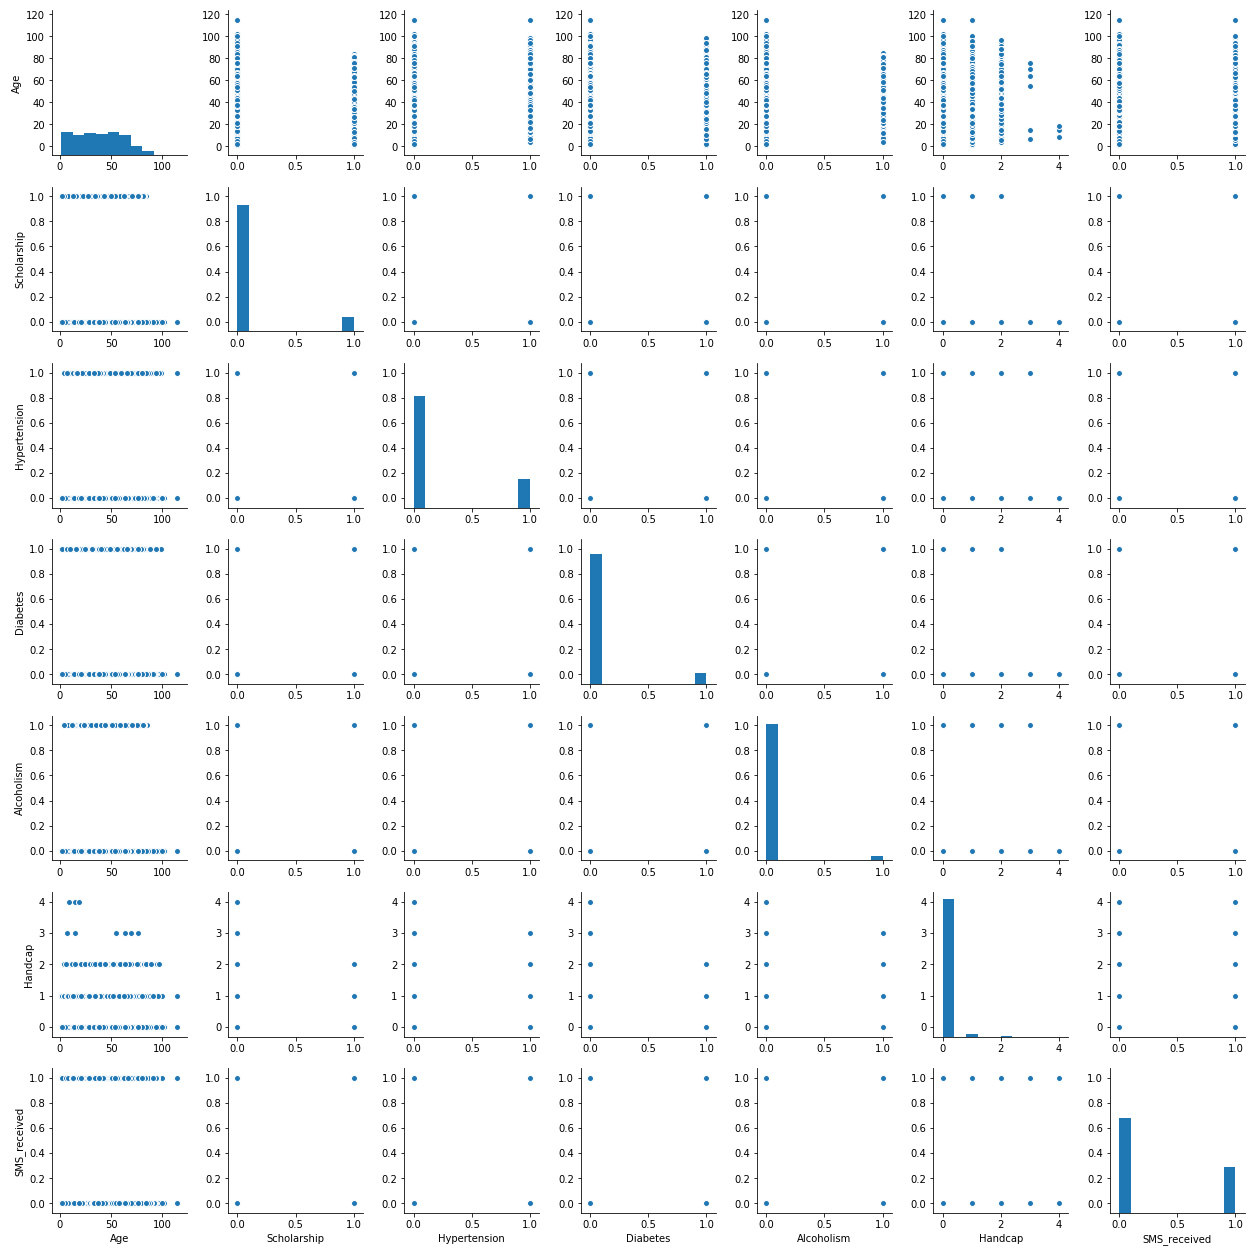

In [53]:
sns.pairplot(df) # for quantities


Text(0.5,1,'show and compare between the number of patients that showed or not related to Hypertension       ')

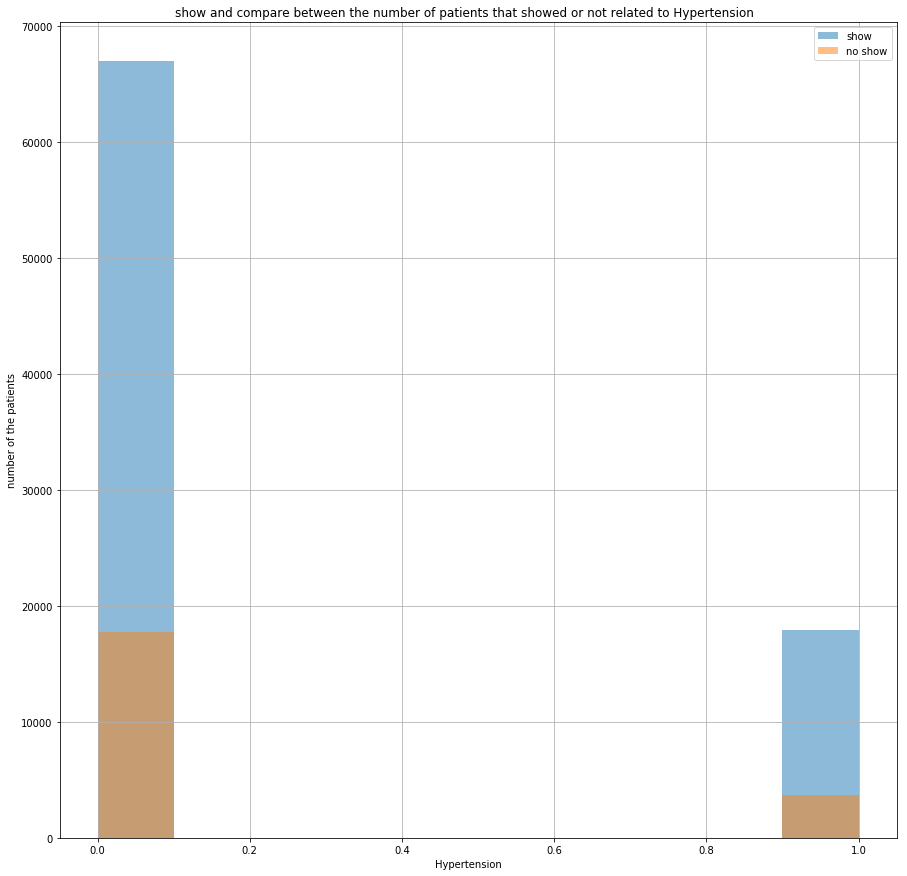

In [32]:
plt.figure(figsize=(15,15))
df.Hypertension[SH_UP].hist(alpha=.5,label='show')
df.Hypertension[no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('Hypertension      ')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Hypertension       ')


Text(0.5,1,'show and compare between the number of patients that showed or not related to Diabetes ')

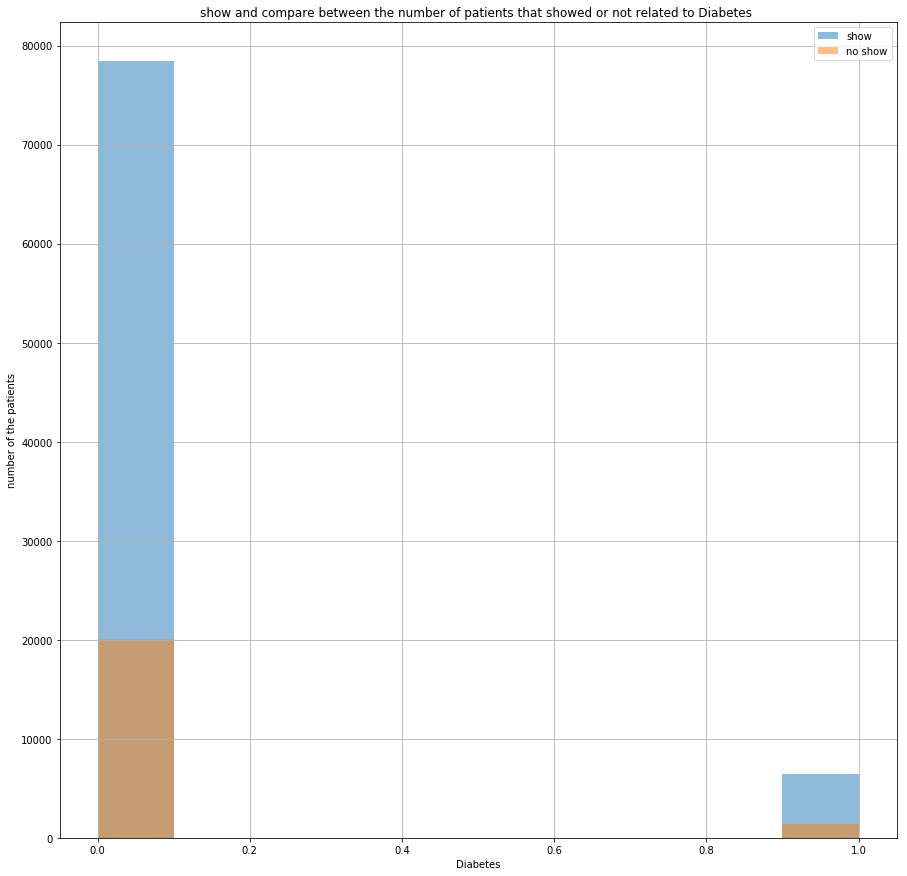

In [33]:
plt.figure(figsize=(15,15))
df.Diabetes[SH_UP].hist(alpha=.5,label='show')
df.Diabetes[no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('Diabetes')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Diabetes ')


Text(0.5,1,'show and compare between the number of patients that showed or not related to Scholarship ')

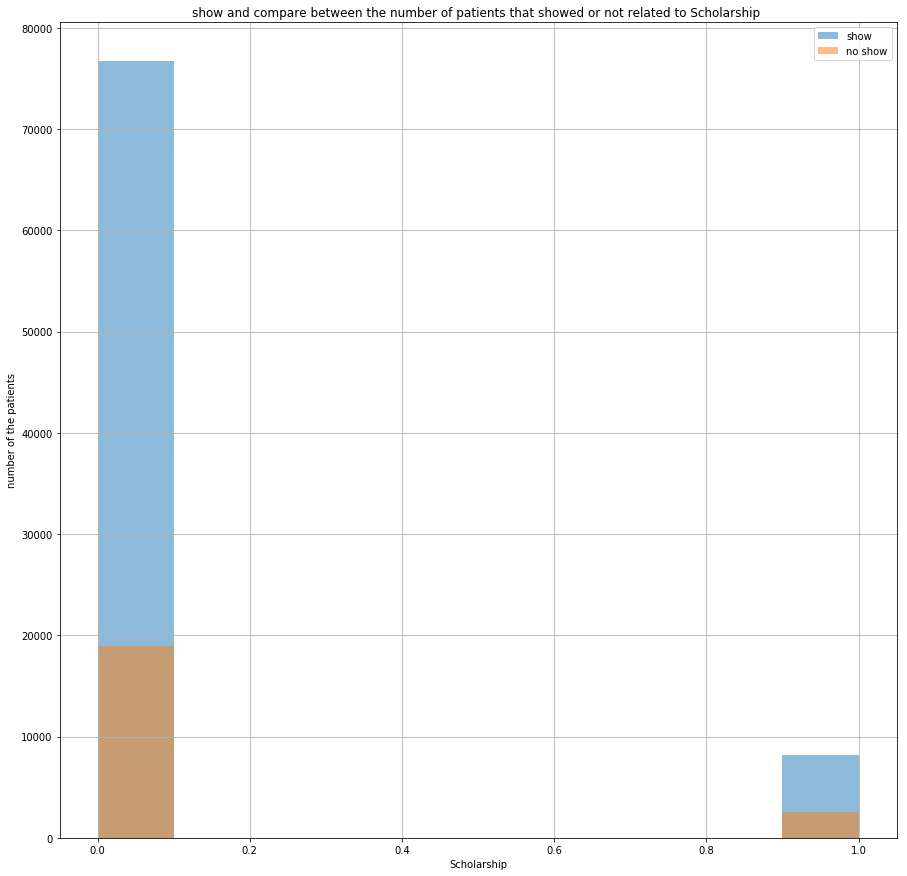

In [34]:
plt.figure(figsize=(15,15))
df.Scholarship[SH_UP].hist(alpha=.5,label='show')
df.Scholarship[no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('Scholarship')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Scholarship ')


Text(0.5,1,'show and compare between the number of patients that showed or not related to Age ')

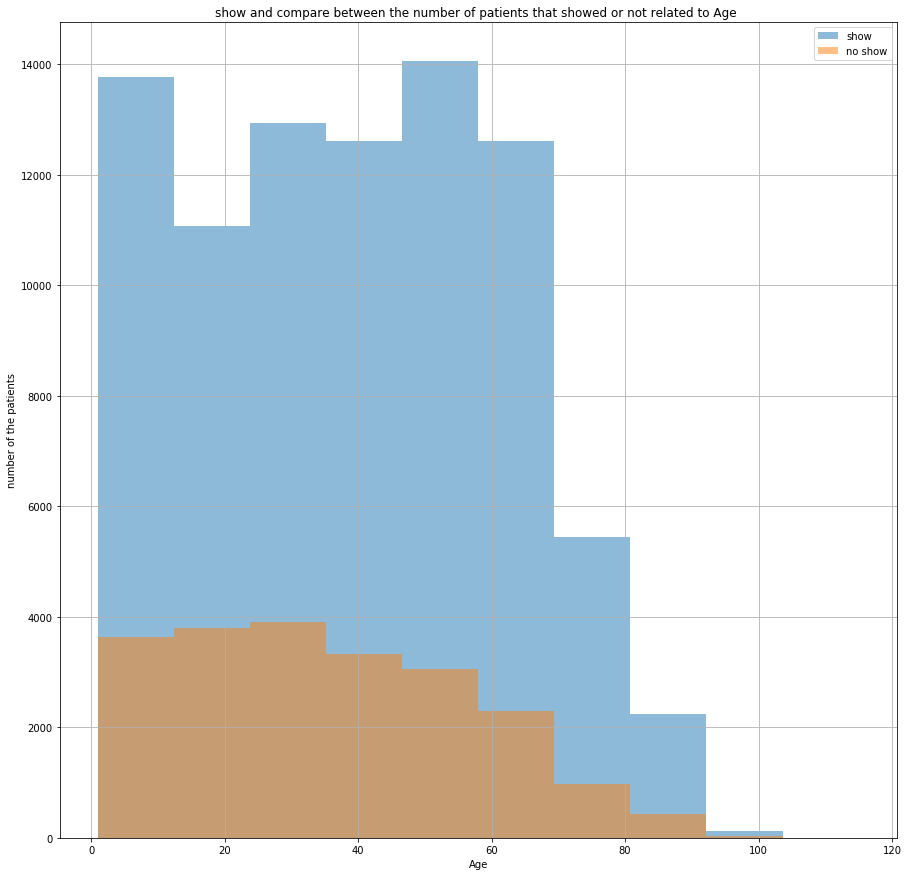

In [35]:
plt.figure(figsize=(15,15))
df.Age[SH_UP].hist(alpha=.5,label='show')
df.Age[no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('Age')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Age ')


### younger patient show up more than older

In [36]:
x1=df['Neighbourhood'][SH_UP].value_counts()
x2=df['Neighbourhood'][no_SH_UP].value_counts()

Text(0.5,1,'show and compare between the number of patients that showed or not related to Neighbourhood ')

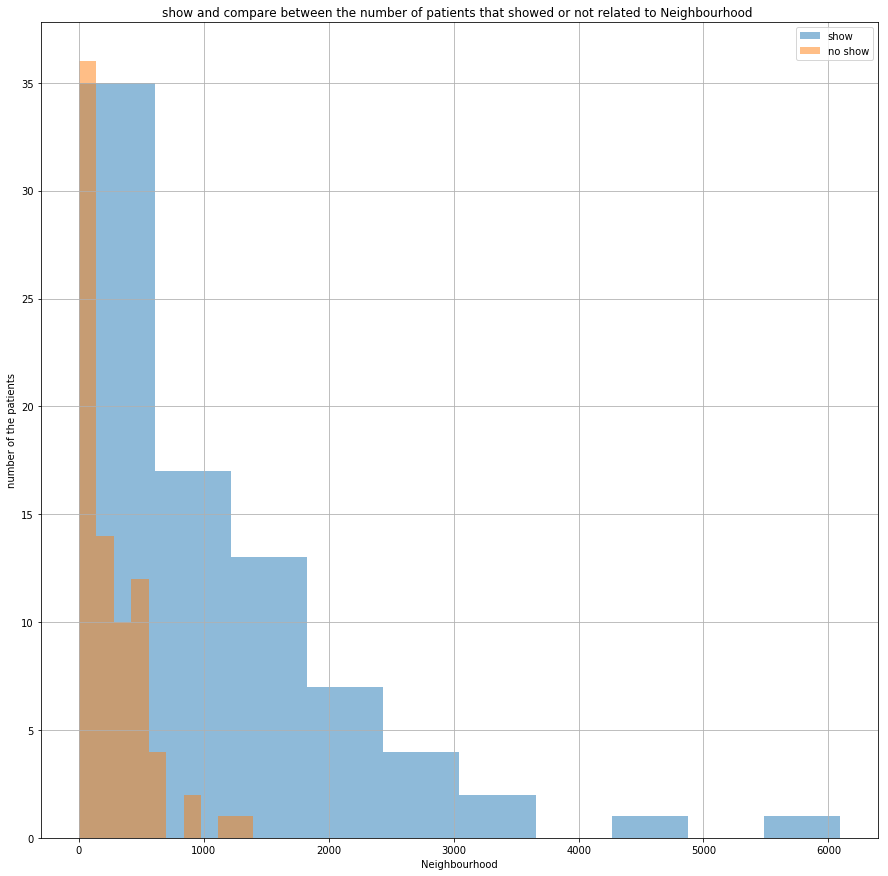

In [37]:
plt.figure(figsize=(15,15))
df['Neighbourhood'][SH_UP].value_counts().hist(alpha=.5,label='show')
df['Neighbourhood'][no_SH_UP].value_counts().hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Neighbourhood ')


Text(0.5,1,'show and compare between the number of patients that showed or not related to Neighbourhood ')

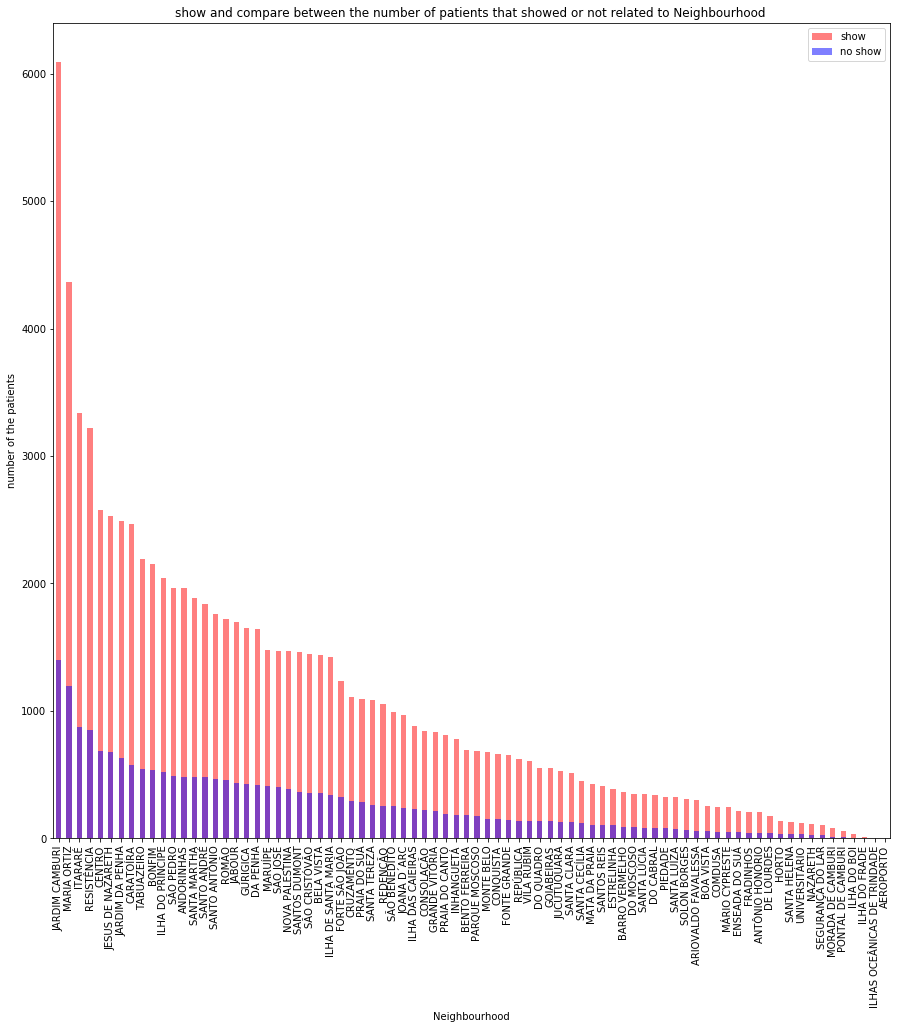

In [38]:
plt.figure(figsize=(15,15))
df['Neighbourhood'][SH_UP].value_counts().plot(kind='bar',color='red', alpha=.5,label='show')
df['Neighbourhood'][no_SH_UP].value_counts().plot(kind='bar',color='blue', alpha=.5,label='no show')
plt.legend()
plt.xlabel('Neighbourhood')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to Neighbourhood ')


Text(0.5,1,'show and compare between the number of patients that showed or not related to SMS_received ')

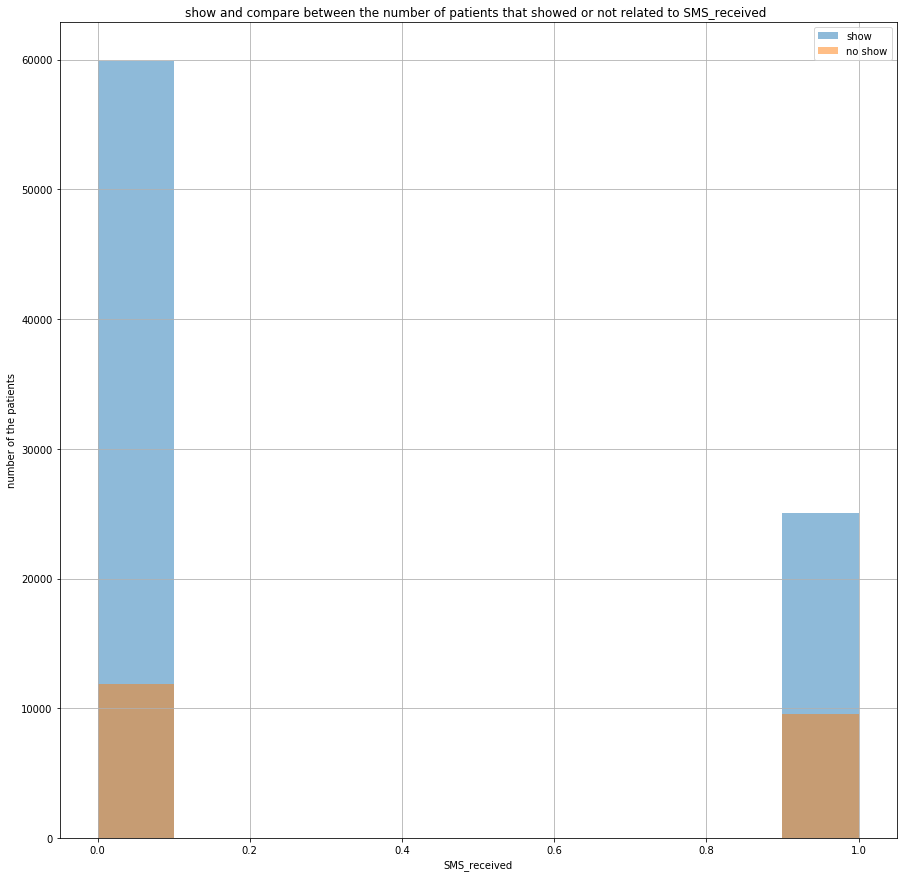

In [39]:
plt.figure(figsize=(15,15))
df['SMS_received'][SH_UP].hist(alpha=.5,label='show')
df['SMS_received'][no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('SMS_received')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to SMS_received ')


In [40]:
df['SMS_received'][SH_UP].value_counts()

0    59882
1    25017
Name: SMS_received, dtype: int64

### many patients showed up atlhough they hadn't reveived any sms

### Neighbourhood have high correlation with patients'showing up and have significant efferct more than others

### Research Question 2  ( did the kind of Gender affects the patient show  up the appointment?)

In [41]:
male=df['Gender']=='M'
female=df['Gender']=='F'
print(male.value_counts())
print(female.value_counts())

False    69699
True     36662
Name: Gender, dtype: int64
True     69699
False    36662
Name: Gender, dtype: int64


In [42]:
df.groupby('Gender').No_show.value_counts()

Gender  No_show
F       No         55562
        Yes        14137
M       No         29337
        Yes         7325
Name: No_show, dtype: int64

Text(0.5,1,'show and compare between the number of patients that showed or not related to gender ')

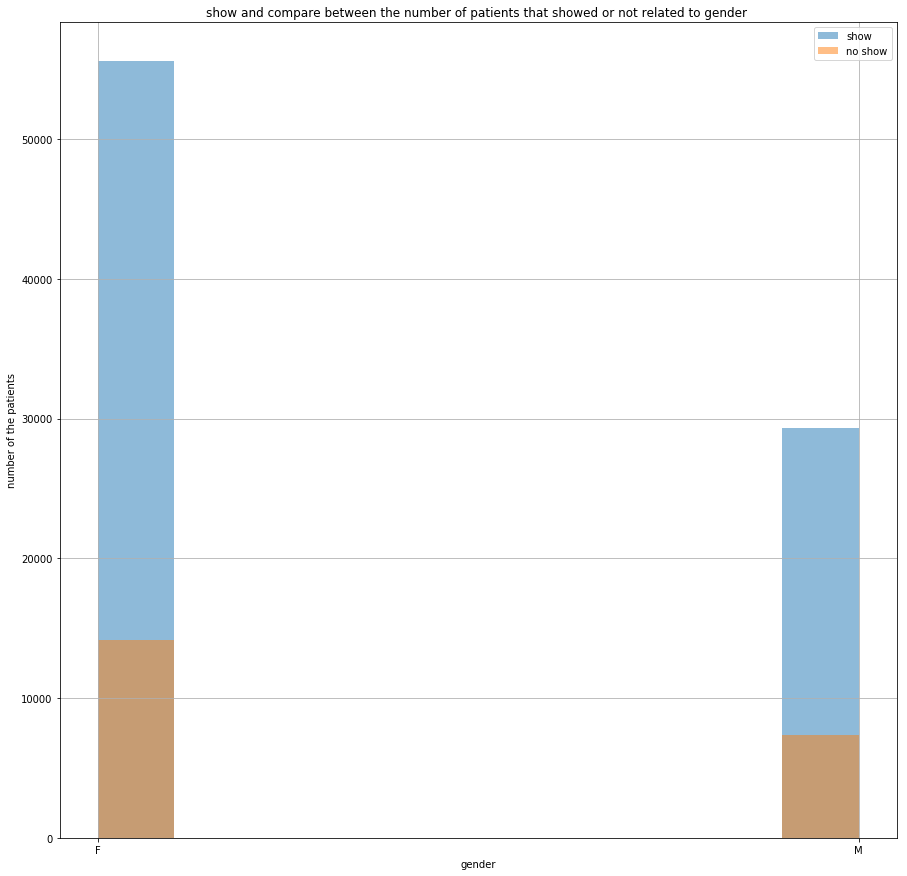

In [43]:
plt.figure(figsize=(15,15))
df.Gender[SH_UP].hist(alpha=.5,label='show')
df.Gender[no_SH_UP].hist(alpha=.5,label='no show')
plt.legend()
plt.xlabel('gender')
plt.ylabel('number of the patients')
plt.title('show and compare between the number of patients that showed or not related to gender ')


##### most of patients are female
##### 7643 only didn't show up  .on the other hand,14455 idn't show up 
### Gender have no significant effect

In [44]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


In [45]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

Neighbourhood have high correlation with patients'showing up and have significant efferct more than others
many patients showed up although they havn't received sms

 younger patient show up more than older
 


### limitations:
 
 correlation between many features like 'gender','Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'  is low 
 
many  features wasn't important  like(AppointmentID,PatientId) so we droped them 

In [46]:
df.groupby('Age').mean().head()

,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
Age,,,,,,
1,0.036107,0.000000,0.000440,0.000000,0.000440,0.249229
2,0.073020,0.000000,0.000619,0.000000,0.000619,0.243193
3,0.089463,0.000000,0.000000,0.000000,0.000000,0.267727
4,0.111025,0.000771,0.000771,0.000771,0.006939,0.293755
5,0.167341,0.000000,0.000000,0.000675,0.002699,0.333333


### communicate

show the mean of the data using pie plot

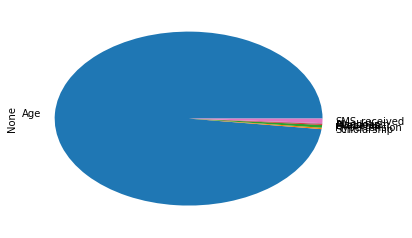

In [47]:
 # average 
df.mean().plot(kind='pie');

show the mean of the data using bar plot

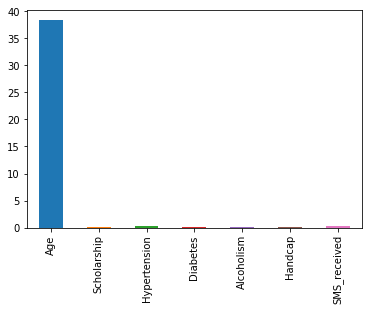

In [48]:
df.mean().plot(kind='bar');

In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255

mean of data  

In [50]:
df.mean()

Age             38.320822
Scholarship      0.101061
Hypertension     0.203797
Diabetes         0.074210
Alcoholism       0.031440
Handcap          0.022856
SMS_received     0.325166
dtype: float64

information about all features

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106361 entries, 0 to 110526
Data columns (total 12 columns):
Gender            106361 non-null object
ScheduledDay      106361 non-null object
AppointmentDay    106361 non-null object
Age               106361 non-null int64
Neighbourhood     106361 non-null object
Scholarship       106361 non-null int64
Hypertension      106361 non-null int64
Diabetes          106361 non-null int64
Alcoholism        106361 non-null int64
Handcap           106361 non-null int64
SMS_received      106361 non-null int64
No_show           106361 non-null object
dtypes: int64(7), object(5)
memory usage: 10.5+ MB
